In [11]:
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [12]:
# Load the data samples
train_data_sample = pd.read_csv("datasets/titanic/train.csv")
test_data_sample = pd.read_csv("datasets/titanic/test.csv")


In [13]:
# Get Data insight
train_data_sample.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_data_sample.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

# First Attempt:
Try to fit data with a RandomForestClassifier, this is just to get a baseline to compare with

In [16]:
# For this to work, it is necessary to do some data cleaning.
# First lets take just the columns with number-like values.
# This is naive, but it would give us something to work with

numeric_samples = train_data_sample.select_dtypes(exclude={'object'})
numeric_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-n

In [17]:
# Ok, As seen before, Age has some null values. As this is a really naive attempt,
# I will just go and set those values as the mean of the Age
mean_age = numeric_samples["Age"].mean()
numeric_samples["Age"].fillna(value=mean_age, inplace=True)
numeric_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-n

In [18]:
# Ok, all data good, take the sample vector and the answers
X_train, Y_test = train_test_split(numeric_samples, test_size=0.2)
x_train = X_train.iloc[:, 2:]
y_train = X_train.iloc[:, 1]

x_test = Y_test.iloc[:, 2:]
y_test = Y_test.iloc[:, 1]

x_train.head()

,Pclass,Age,SibSp,Parch,Fare
386,3,1.0,5,2,46.90
774,2,54.0,1,3,23.00
603,3,44.0,0,0,8.05
818,3,43.0,0,0,6.45
525,3,40.5,0,0,7.75


,Pclass,Age,SibSp,Parch,Fare
756,3,28.000000,0,0,7.7958
139,1,24.000000,0,0,79.2000
284,1,29.699118,0,0,26.0000
511,3,29.699118,0,0,8.0500
744,3,31.000000,0,0,7.9250


In [19]:
# Build the classifier
model = RandomForestClassifier(random_state=0, n_estimators=200, criterion="entropy")
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [20]:
# Measure the accuracy
accuracy_score(y_test, model.predict(x_test))

0.7094972067039106

0.7094972067039106

## Not bad for a first try:
Let's test a few other models against this same dataset

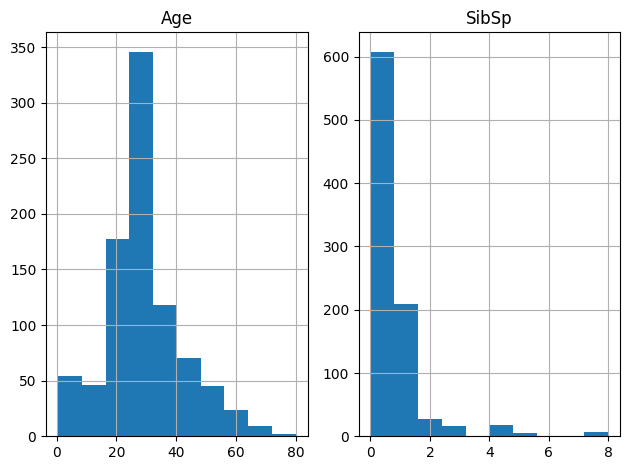

In [22]:
# Let's see the distribution of different features, maybe we can use a Naive Bayes
# classifier, or arrange for one
from matplotlib import pyplot as plt

plt.rcParams["figure.autolayout"] = True

_, axes = plt.subplots(1, 2)

train_data_sample.hist('Age', ax=axes[0])
train_data_sample.hist('SibSp', ax=axes[1])

plt.show()

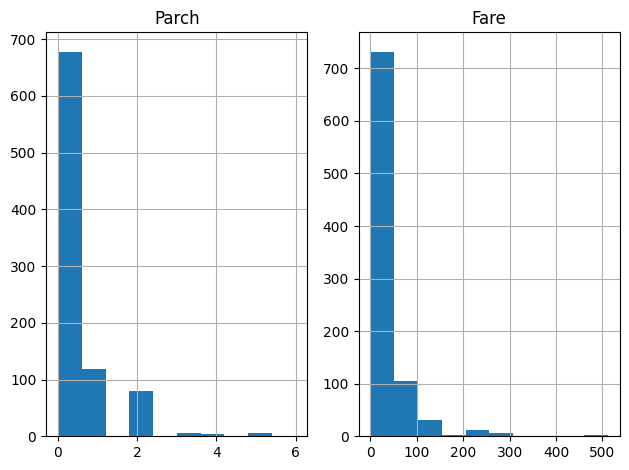

In [24]:
_, axes = plt.subplots(1, 2)
train_data_sample.hist('Parch', ax=axes[0])
train_data_sample.hist('Fare', ax=axes[1])
plt.show()

In [31]:
# Most of the continuos variables does not seems to have a "normal" distribution,
# so a Guassian Naive Bayes Model should not work well here. Maybe we can improve
# the RandomForestClassifier finding out which features are not correlated with
# the Survived outcome

# Let's check the passanger class, and see if it has some correlation
pclass_survived = pd.crosstab(index=train_data_sample["Pclass"], columns=train_data_sample["Survived"])
pclass_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [41]:
from scipy.stats import chi2_contingency

# H0 (there is no correlation, ie, PClass and Survived are independent)
# H1 (PClass and Survived are dependent)
# if X2 <= 0.05 then we reject H0

def test_independence(col1, col2, df):
    contingecy_table = pd.crosstab(index=df[col1], columns=df[col2])
    _, p_value, _, _ = chi2_contingency(contingecy_table)

    # p_value is the chi_squared statistic, also called alpha,
    # by definition P(Reject H0 | H0 is True) = alpha, so if alpha
    # is really small, then we can reject H0 with 1 - alpha confidence
    # level

    print(f"Reject H0: {p_value <= 0.05}" f" with p-value {str(p_value)}")
    if p_value <= 0.05:
        print(f"{col1} and {col2} are correlated")
        print("Confidence level %s " % (1.0 - p_value))
    else:
        print(f"{col1} and {col2} are not correlated")

test_independence("Survived", "Pclass", train_data_sample)

Reject H0: True with p-value 4.549251711298793e-23
Survived and Pclass are correlated
Confidence level 1.0 


In [42]:
import functools

corr_test = functools.partial(test_independence, "Survived")
# Pclass is a good feature for our RandomForestClassifier, let's test for sib
# or parch

corr_test("SibSp", train_data_sample)
corr_test("Parch", train_data_sample)

Reject H0: True with p-value 1.5585810465902116e-06
Survived and SibSp are correlated
Confidence level 0.9999984414189534 
Reject H0: True with p-value 9.703526421039997e-05
Survived and Parch are correlated
Confidence level 0.9999029647357895 


In [46]:
# Run ANOVA test for the Fare and Age variables

# H0: variables are not correlated
# H1: variables are correlated

# p-value <= 0.05 Reject H0
from scipy.stats import f_oneway

def test_anova(df: pd.DataFrame, col1: str, col2: str):
    """Assume that col1 is the categorical variable"""
    # group by the categorical variable
    category_group_list = df.groupby(col1)[col2].apply(list)
    _, p_value = f_oneway(*category_group_list)

    print(f"Reject H0: {p_value <= 0.05}" f" with p-value {str(p_value)}")
    if p_value <= 0.05:
        print(f"{col1} and {col2} are related")
        print("Confidence level %s " % (1.0 - p_value))
    else:
        print(f"{col1} and {col2} are not related")

anova = functools.partial(test_anova, train_data_sample, "Survived")

anova("Fare")
anova("Age")

Reject H0: True with p-value 6.120189341921873e-15
Survived and Fare are related
Confidence level 0.9999999999999939 
Reject H0: True with p-value 0.03721708372683364
Survived and Age are related
Confidence level 0.9627829162731664 


In [49]:
# Ok, all our parameters seems related with the survivability.
# Let's explore some of the unused data in the original dataset.

cross_sex_surv = pd.crosstab(index=train_data_sample["Sex"], columns=train_data_sample["Survived"])
cross_sex_surv

Survived,0,1
Sex,,
female,81,233
male,468,109


In [51]:
# From a simple looking of our cross table, is evident that
# sex has a lot to do with survivability. Lets encode that
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sex_encoded_dataset = train_data_sample.copy()
sex_encoded_dataset.Sex = le.fit_transform(sex_encoded_dataset.Sex)

sex_encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [52]:
numeric_samples = sex_encoded_dataset.select_dtypes(exclude={'object'})
numeric_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [53]:
# Ok, As seen before, Age has some null values. As this is a really naive attempt,
# I will just go and set those values as the mean of the Age
mean_age = numeric_samples["Age"].mean()
numeric_samples["Age"].fillna(value=mean_age, inplace=True)
numeric_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [55]:
# Ok, all data good, take the sample vector and the answers
X_train, Y_test = train_test_split(numeric_samples, test_size=0.2)
x_train = X_train.iloc[:, 2:]
y_train = X_train.iloc[:, 1]

x_test = Y_test.iloc[:, 2:]
y_test = Y_test.iloc[:, 1]

x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
751,3,1,6.0,0,1,12.475
400,3,1,39.0,0,0,7.925
696,3,1,44.0,0,0,8.050
834,3,1,18.0,0,0,8.300
297,1,0,2.0,1,2,151.550


In [60]:
# Build the classifier
model = RandomForestClassifier(random_state=0, n_estimators=200, criterion="entropy")
model.fit(x_train, y_train)


# Measure the accuracy
print("%.2f" % (accuracy_score(y_test, model.predict(x_test)) * 100) +"%")

77.09%


In [ ]:
# Cool, managed to improve it to 77%